# Problem

The Twin-Cities Metropolitan, Minneapolis and St. Paul is currently experiencing challenges in rental housing scarcity and affordability. A March 2017 HUD Comprehensive Housing Market Analysis cited the apartment market vacancy rate as 2.3% in the fourth quarter of the 2016 year. Additionally, the StarTribune Newspaper reported in June of 2017 that since the 2010 year, 17,000 new apartments have been constructed in the Twin-Cities since 2010, yet demand is still above the available supply. 
	
A better understanding of where rental housing is unaffordable and what specific factors impact the affordability of rental housing can assist planners in creating smarter policies around affordable housing. Such policies might include where to locate affordable housing, when affordable housing is in high/low demand and, - for lack of their affordable abundance in the housing stock -  which housing types and attributes (square footage, bathrooms, bedrooms) to reserve or construct as affordable units. 

Using data on Twin-Cities housing rental ads from craigslist integrated with US Census data, this project seeks to solve the problem of planning affordable housing by estimating real-time affordability in the rental market  and predicting the affordability of a Craigslist apartment rental dependent on a handful of variables. 

# Client

The client for this project is the Metropolitan Council, a body involved in planning, policy, and the provision of services for the Twin-Cities metropolitan area in Minnesota. The Metropolitan Council states as a main priority of its agenda improving housing opportunities in the region. As such, it has created several comprehensive plans and agendas to address present and future issues in housing. Some components of these plans, such as the 2011-2020 Allocation of Affordable Housing Need attempt to meet demands of affordable housing in communities throughout the metro area through plans drafted using forecasted models. Others are focused on shaping the livability of communities, with the understanding that good housing policy not only meets the needs of a community to house its population, but also factors in the proximity of housing to good transportation, city services, employment and schools. The Metropolitan Council can use the results of this project in two ways. First, the project can serve as a proof of concept for ways to collect and run analytics on semi-informal, crowd-generated data sources that provide valuable insights into rental housing trends. Second, the Metropolitan Council can integrate the results of this project with the information that they already have on affordability trends to shape their understanding of where affordable housing is most needed in the Twin Cities real-time, and what the most important predictor variables of housing affordability are. 


# The Data

### Craigslist Data 

The craigslist data was collected from December 2017 to April 2018. A web-scraper was run every other day during this time period. There were some data collection days when data collection failed or did not run. In such cases, data collection carried over to the next day or was run as soon as possible at which point the every-other-day frequency of collection resumed. Data from each collection data was stored in a csv file, which were later merged and duplicates removed in the data cleaning process. 

Part of the data for this project was collected by __[scraping the Minneapolis housing rental ads craigslist page](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Web%20Scrape%20Craigslist%20Housing%20Rentals%20Data_1.ipynb)__. This included craigslist ads from the __[entire Minnesota-Wisconsin Twin Cities Metropolitan Area. ](https://minneapolis.craigslist.org/)__ 

The craigslist data was collected from December 2017 to April 2018. A __[web scraper](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Web%20Scrape%20Craigslist%20Housing%20Rentals%20Data_1.ipynb)__  was run every other day during this time period. There were some data collection days when data collection failed or did not run. In such cases, data collection carried over to the next day or was run as soon as possible at which point the every-other-day frequency of collection resumed. Data from each collection data was stored in a __[csv file](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Collection%20and%20Cleaning/Data%20Sources/craigslist_scraped_data)__ , which were later merged and duplicates removed in the data cleaning process. At the end of the data cleaning process, the __[dataset](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Data%20Sources/final_df_with_baths.csv)__ contained 17 columns:


ADDRESS: The address that appeared in the craigslist listing

BEDS BOOLEAN: Whether or not the listing initially contained a beds attribute out of all of the tags pulled during web scraping

PRICE BOOLEAN: Whether or not the listing initially contained a price attribute out of all of the tags pulled during web scraping

SQUARE FEET BOOLEAN: Whether or not the listing initially contained a square feet attribute out of all of the tags pulled during web scraping

BEDS: The beds value contained in at least one of the tags pulled during web scraping

BATHS: The baths value contained in at least one of the tags pulled during web scraping

COUNTY: The county contained in one of the tags pulled during web scraping

DATETIME: The date and time tag pulled during web scraping specifying when the listing was posted

GEOCODED LATITUDE: (type float): The latitude identified by the Google Geocode API given the ADDRESS column as an input

GEOCODED LONGITUDE: (type float): The longitude identified by the Google Geocode API given the ADDRESS column as an input

POST ID: The unique id assigned to the post. A duplicate post may have a unique id if posted at a different time

PRICE: The price value contained in one of the tags pulled during web scraping

SQUARE FEET: The square feet of the listing pulled during web scraping

TITLE: The title of the listing obtained through web scraping

URL: The URL of the page that was requested during web scraping

ONE TO STUDIO: Listings where the BED attribute was converted to value “Studio” from value “1” because the listing was suggested as a “Studio” in the TITLE attribute

BED ASSIGNED: Listings where the BED BOOLEAN attribute was value False and the BED value was assigned using the text available in the TITLE column

### Spatial Data

There were 3 spatial datasets merged with the craigslist data. Two of these datasets were spatial boundaries of municipalities in __[Hennepin](https://gis-hennepin.opendata.arcgis.com/datasets/c36362ca783240ec974e29b87063a144_4)__ and __[Ramsey](http://openramsey-ramseygis.opendata.arcgis.com/datasets/1d885379344b4bd9b98beb6ba70f1175_1)__ county open data portals, so as to get a CITY attribute for each listing. These were obtained through Hennepin and Ramsey Counties open data portal. The other spatial dataset was obtained through the __[State of Minnesota Geospatial Common](https://gisdata.mn.gov/dv/dataset/bdry-zip-code-tabulation-areas)__ and contained the zipcode boundaries for the entire state of Minnesota. These datasets added CITY and ZIPCODE attributes to the data through spatial joins. 

ZIPCODE: The __[Minnesota Zipcode Boundary](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Storytelling/MN_Zipcodes)__ zipcode boundary from the __[still need to figure this out]()__ the GEOCODED LATITUDE and GEOCODED LONGITUDE are located, obtained through 

CITY: The data was obtained through a spatial join between the GEOCODED LATITUDE & GEOCODED LONGITUDE attributes, and the municipality boundary shapefiles of  __[Hennepin](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Collection%20and%20Cleaning/Data%20Sources/Hennepin_County_Municipalities)__ and __[Ramsey](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Collection%20and%20Cleaning/Data%20Sources/Ramsey_County_Municipalities)__ counties

### Census Data

Using the __[uszipcode](https://pythonhosted.org/uszipcode/)__ library in python, census data was __[merged with the craigslist](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/Bring%20In%20More%20Census%20Attributes.ipynb)__ dataset along ZIPCODE. __[Specific metadata on attributes in the uszipcode library are also available](http://proximityone.com/cen2010_zcta_dp.htm)__. Attributes used are as follows, first with the name that they were given in this project and in parenthesis the name that they were given in the uszipcode library.

TOTAL UNITS (HouseOfUnits) : Total number of units in zipcode

DENSITY (Density): Population per square miles in zipcode

POPULATION (Population): Total population in zipcode 

AGGREGATE WAGES (TotalWages): Aggregate income of all households in zipcode

WATER AREA (WaterArea): Aggregate amount of water area in square meters per zipcode

LAND AREA (LandArea): Aggregate amount of land area in square meters per zipcode

AVERAGE ANNUAL INCOME (Wealthy): Average Annual Wage (AAW) = total wage / population




# Data Cleaning


### __[Prepare Scraped Data For Geocoding (see script)](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Prepare%20Scraped%20Data%20For%20Geocoding_2.ipynb)__

To begin the data cleaning process, data from __[csv files](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Collection%20and%20Cleaning/Data%20Sources/craigslist_scraped_data)__ was first combined into a single data container. As can be seen in the data columns below, craigslist housing rental ads to not follow a standard format being it that a lot of freedom is left to the user about what information/attributes they include in their ad.  Cleaning the data required the creation and elimination of numerous data columns. 

In [144]:
import pandas as pd
df = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Collection and Cleaning\Data Sources\craigslist_scraped_data\Craigslist_ApartmentData_Minneapolis_2_1.csv", names=['address', 'square feet', 'beds_baths', 'datetime', 'square feet 2', 'latitude', 'title', 'longitude', 'map accuracy', 'price', 'url', 'post id'])
df.head(5)

,address,square feet,beds_baths,datetime,square feet 2,latitude,title,longitude,map accuracy,price,url,post id
0.0,165th st at 253 1/2 ave,available feb 10,0BR / 1Ba,2018-02-01T21:01:18-0600,NaN,45.433274,remodeled cabin near lake; big lake zimmerman,-93.690033,5.0,$850,https://minneapolis.craigslist.org/csw/apa/d/r...,post id: 6481477878
0.0,NaN,available jan 25,1142ft2,2018-01-25T19:13:10-0600,/ 1142ft2 -,45.019200,Fully furnished 3 bedroom 1 bathroom single fa...,-93.240100,22.0,$2895,https://minneapolis.craigslist.org/wsh/apa/d/f...,post id: 6473043658
0.0,Bent Tree Hills Drive,4500ft2,2BR / 1.5Ba,2018-02-01T20:55:52-0600,/ 2br - 4500ft2 -,45.067020,SUPER BOWL Housing 11 miles from US Bank Stadi...,-93.226648,20.0,$799,https://minneapolis.craigslist.org/ram/apa/d/s...,post id: 6481473938
0.0,NaN,available jan 20,1339ft2,2018-01-20T21:20:36-0600,/ 1339ft2 -,44.983500,Fully furnished 2 bedroom 1.5 bath unit availa...,-93.268300,22.0,$2250,https://minneapolis.craigslist.org/dak/apa/d/f...,post id: 6467201697
0.0,3238 garfield ave,2688ft2,4BR / 4Ba,2018-01-30T14:31:05-0600,/ 4br - 2688ft2 -,44.944031,4 Bedroom 4 Bath townhouse with huge rooftop d...,-93.286870,10.0,$3400,https://minneapolis.craigslist.org/hnp/apa/d/4...,post id: 6478632049


The “square feet” column contains, in the majority of cases, either a value of the square feet for the rental, or an availability date. The “beds_baths” column more often than not contains the number of beds and baths of the rental. The “square feet 2” column more often than not contains the number of bedrooms and the square feet of the rental. Throughout the dataset there were missing values from the three aforementioned columns. In some cases a value was missing in one of the columns but available in one or both of the other two columns. For example, a value in “square feet” may have been missing, but was present in the “square feet 2” column, vice versa. To deal with these missing values and capture as much data as possible, several boolean columns were created which indicated if either the bedrooms or square feet variable was available in one of the three aforementioned columns. The regular expression function findall was used to capture and store the value where it was present, so as to later fill the column containing final bedroom values or square feet values. This was done in a specific order, surveying each column. Subsequently, the two final columns with bedroom and square feet values were cleaned to eliminate end-fixes such as “ft” and “BR”. These include the “beds_baths”, “square feet”, and “price” columns. 

Duplicate values were dropped from the dataframe using the “post id” column that contained unique values. There were rows where the “post id” column was null so the “title” column was also leveraged in removing duplicates. It should be stated that a duplicate value in the “title” column does not necessarily indicate a duplicate post, be it due to different time, price or other attributes across posts with the same title, so there is some risk in losing data (at the end of the project, it was discovered that the "url" column is also unique and contained no null values, so this is one step upon which the pipeline can be improved for the future). In order to drop the least amount of duplicates by title,  two dataframes were created: one absent  null “post id” values and one containing only null “post id” values. As such, duplicates were dropped using the “title” column only for rows with null “post id” values. These two separate dataframes were then joined back together.


There was potential for noise in the data with Minneapolis hosting the Superbowl during the period that the data was collected. Superbowl ads contained price values not representative of the normal rental market or the standard month-to-month price on a listing. These values were eliminated by searching for superbowl-related patterns in  the “title” column. Rows where a superbowl-related ad was found were dropped.

In [145]:
df.iloc[2][['title', 'price']]

title    SUPER BOWL Housing 11 miles from US Bank Stadi...
price                                                 $799
Name: 0.0, dtype: object

### __[Geocoding (see script)](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Geocoding%20Script_3.ipynb)__

Many steps in the data cleaning process were taken  to capture as precise and accurate geospatial data as possible. Firstly, the “latitude”, “longitude” and “map accuracy” columns were removed, as this information - initially scraped from the html of the urls of ads - did not provide accurate or reliable data on the location of rentals. Instead, values were geocoded using the Google Geocode API. Values “False” in the “address_check” column were fed into the geocoding script (though it’s counterintuitive, False indicated the presence of an address). 

Geospatial information was available at the county level for each ad in the“url” of each ad, which contains a three-letter abbreviation identifying the county in which the rental is located. Under the assumption that the value in the three letter value in the url reflected the true county in which the ad was located, a “counties” column was created by extracting this value from the “url” column. After creating data columns with county information, a column called “county_state” was created, which contains a string  “(county) + Minnesota”. This string was inserted at the end of each address input into the google geocoder in an attempt to achieve a higher geocoding accuracy. it is not clear whether or not this impacted the accuracy of the geocoder. It is unlikely, and would need to be verified using a sampling and verification method in future iterations of this project. Addresses that were, for whatever reason, not geocoded as a location in the state of Minnesota, were dropped from the data set. 

While it is not fully apparent in the data cleaning code, not all csv files containing web-scraped craigslist listings were globbed all at once. The Google Geocode API only allowed 2,500 requests per day and so the cleaned .csv was run daily through the geocoding script, incrementing the iterrows indexing line of code by 2,500 each time. Additionally, data collection and other data cleaning processes occurred alongside geocoding processes, so not all data was available to be geocoded during each iteration. There were three iterations of globbing csvs containing web-scraped data, cleaning, and geocoding, as evidenced by the __[three geocoding .csv files in the repository](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/tree/master/Data%20Collection%20and%20Cleaning/Data%20Sources/geocoded_data)__. Replications of this project will need to account for nuances in iterations of data cleaning of the like.

### __[Preparing the Data For Data Storytelling (See Script)](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Prepare%20Data%20For%20Mapping%20After%20Geocoding_4.ipynb)__

The geocoded data underwent further cleaning steps. All address values that produced an error during the geocoding process or simply did not have an address were dropped from the dataset and excluded from the analysis. In addition, It was determined that bed values Studio-4 units would be included in the analysis. These 5 values correspond with the fair market rent, had the least proportions of identified outliers (read on for steps on identifying outliers) and had the greatest amounts of listings. 

The data was subsetted by county to only include values from Hennepin and Ramsey counties with address locations would be included in the analysis.

Summary statistics were obtained for five groupings of the data: Studio, 1, 2, 3 and 4 values in the “beds_baths” column indicating the number of units an advertised listing contained. Where the “beds_baths” values were “0” or null as indicated by a “False” value in the “beds boolean column”, the “titles” column was searched for any information that would indicate these values as a Studio, 1, 2, 3 or 4 bedroom. Half of these values were matched with one of the aforementioned groupings simply by sccanning the text data available in the "title" column. This is a questionable method, as some listings that are more general, - perhaps an ad for multiple available apartment types for a property company - may list several of these bedroom value types. The other rows that remained unmatched were dropped from the data set and further analyzed using inferential statistics.	

Before identifying outliers, the data was segmented by the five bedroom categories: Studio, 1, 2, 3, 4. Outliers in the “price” and “square feet” columns of the dataset were identified and managed respective of these five groupings. Values in these two columns 1.5 times the IQR below the 25th percentile, or 3 times the IQR above the 75th percentile were considered outliers. This step in data cleaning mainly aimed to remove values in the “price” column that were 1, - usually indicating an incomplete or spam ad - or a number like 25 dollars, that was likely advertising a nightly rent at a motel, not monthly cost. Some of the highest values in the “price” column were in the millions, so a threshold of 3 times the interquartile range was seen as a reasonable value to remove some of these all in one sweep. Values labeled outliers were removed from the dataset. 

Null values in the “price” and “square feet” columns were filled with the mean price and square feet values of their respective bedroom groupings. There was not a large amount of null values for either attribute.

__[In order to include the number of bathrooms per listing in the machine learning models, one final iteration was performed on the data to grab and clean the "bath" values.](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Collection%20and%20Cleaning/Code/Going%20Back%20To%20Get%20Baths%20Values_5.ipynb)__ 


# Investigating The Data Before Machine Learning

## To further investigate the data to determine directions to take in machine learning, the following questions were asked:

1. Where are craigslist housing rental ads distributed throughout Hennepin and Ramsey Counties?
2. Using craigslist housing rental ads as a proxy, and HUD Fair Market Rents as a threshold for affordability, what are the spatial patterns of affordability in Hennepin and Ramsey Counties?
4. What is the integrity of the data when it comes to the bedroom attribute for a listing (ex: studio, 1, 2, 3, 4, no bedroom)?
3. What is the relationship between square feet and price?
5. Is there a relationship between Time and Price?

In [146]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from uszipcode import ZipcodeSearchEngine
from shapely.geometry import Point
import geojson
import json
import pickle
import folium
from folium import plugins
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style="whitegrid")
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels as statsmodels
from scipy import stats
import bokeh.plotting as bkp
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import pylab

### Spatial Joins For Creating Maps

In [147]:
# read in cleaned rentals data as geodataframe
data = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Collection and Cleaning\Data Sources\cleaned_data_final.csv")
# convert latitude and longitude points into GIS data points
geometry = [Point(xy) for xy in zip(data['geocode_lon'], data['geocode_lat'])]
# set projections for geometry 
crs = {'init': 'epsg:4326'}
locations = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)
locations = locations.to_crs({'init': 'epsg:4326'})

In [148]:
# create geodataframe of zipcodes of Minnesota
zipcodes = gpd.GeoDataFrame.from_file(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\MN_Zipcodes\zip_code_tabulation_areas.shp')
# set projection of zipcodes
zipcodes = zipcodes.to_crs({'init': 'epsg:4326'})
# rename column of minnesota zipcodes file
zipcodes = zipcodes.rename(columns={'GEOID10': 'zipcodes'})
# perform spatial join between craigslist 
loc_zip_join = gpd.sjoin(locations, zipcodes, how="left", op='within')
# re-size dataframe to only include necessary columns
final_df = loc_zip_join[['address', 'beds boolean', 'beds_baths', 'county', 'county_full', 'datetime', 'geocode_lat', 'geocode_lon', 'post id', 'price', 'price boolean', 'square feet', 'square feet boolean', 'title', 'url', 'County', 'City', 'bed assigned', 'no match', 'index match', 'outlier', 'zipcodes']]

### Grouping Data By Number of Bedrooms and Rating Affordability Using __[2018 Twin-Cities Fair Market Rent](https://www.huduser.gov/portal/datasets/fmr/fmrs/FY2018_code/2018summary.odn)__ and Integrating Dataset of __[Boolean Classifications of Price Values At Various Thresholds Over FMR Using Respective Standard Deviations of Grouped Bedroom Values](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/over_fmr_dataframe.csv)__


## Twin-Cities 2018 Fair Market Rent $

#### Studio: 711

#### 1 Bedroom: 864

#### 2 Bedroom: 1089

#### 3 Bedroom: 1547

#### 4 Bedroom: 1812


In [149]:
df_vals_over_fmr = pd.read_csv(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Collection and Cleaning\over_fmr_dataframe.csv')

## 1, 2 and 3 Values Indicate Number of Standard Deviations (Standard Deviations of Each Bed Grouping Distribution) For Which Price is Over 2018 FMR Specified For Unit Type By HUD

In [150]:
df_vals_over_fmr[['beds_baths', 'price', 'over fmr1', 'over fmr2', 'over fmr3']][200:215]

,beds_baths,price,over fmr1,over fmr2,over fmr3
200,2,1700.0,1,0,0
201,1,1410.0,1,0,0
202,1,1337.0,1,0,0
203,1,1225.0,1,0,0
204,2,1519.0,0,0,0
205,1,1225.0,1,0,0
206,2,1450.0,0,0,0
207,1,1390.0,1,0,0
208,studio,1100.0,1,0,0
209,studio,1100.0,1,0,0


# __[Wrangling Data From uszipcode Library For Spatial Vizualization](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/craigslist_munged.csv)__

In [151]:
# read in over fmr dataframe 
df_vals_over_fmr = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\over_fmr_dataframe.csv")
df_vals_over_fmr['beds_baths'].value_counts()

1         7498
2         6741
3         1457
studio     979
4          436
Name: beds_baths, dtype: int64

In [152]:
beds_per_zip_craigslist = pd.read_csv(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\craigslist_munged.csv')

listings in zip: The number of listings in the zipcode 

listings over fmr: The number of listings in the zipcode at least one standard deviation over FMR

zipcodes: The zipcode number

total units: The total units in zipcode according to uszipcode library data

wealth: Average Annual Wage (AAW) = total wage / population

pct of all listings: The percentage of all listings in dataset per zipcode

pct of all listings over fmr: The percentage of listings over fmr in dataset per zipcode

above median: Boolean of whether listing is above or below median Average Annual Wage

affordability difference: The difference between "pct of listings over fmr" and expected proportion over fmr, "pct of all listings" ie "pct of all listings" - "pct of all listings over fmr"

# __[Data Used For Spatial Vizualization](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/craigslist_munged.csv)__

In [153]:
# print out data used for spatial vizualization
beds_per_zip_craigslist

,index,zipcodes,listings over fmr,listings in zip,total units,wealth,pct of all listings,pct of all listings over fmr,affordability difference,above median
0,0,55101,437,472,4156.0,24752.814735,0.027585,0.052461,-0.024876,True
1,1,55102,55,122,10105.0,21611.193442,0.007130,0.006603,0.000527,False
2,2,55103,0,39,5179.0,10686.089447,0.002279,0.000000,0.002279,False
3,3,55104,13,177,18536.0,16690.179661,0.010344,0.001561,0.008784,False
4,4,55105,9,86,11495.0,28321.207029,0.005026,0.001080,0.003946,True
5,5,55106,0,120,19597.0,12055.020766,0.007013,0.000000,0.007013,False
6,6,55107,3,33,5704.0,12654.903492,0.001929,0.000360,0.001568,False
7,7,55108,93,329,6545.0,20805.020833,0.019227,0.011164,0.008063,False
8,8,55109,0,49,13166.0,19396.222777,0.002864,0.000000,0.002864,False
9,9,55110,11,46,15844.0,25393.557562,0.002688,0.001321,0.001368,True


### Get Spatial Data For Each Zipcode Boundary For Map Vizualization

In [154]:
zipcodes = gpd.GeoDataFrame.from_file(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\MN_Zipcodes\zip_code_tabulation_areas.shp')
# set projection of zipcodes
zipcodes = zipcodes.to_crs({'init': 'epsg:4326'})
# rename column of minnesota zipcodes file
zipcodes = zipcodes.rename(columns={'GEOID10': 'zipcodes'})

In [155]:
# subset minnesota zipcodes
# so as to match those containing craigslist rental ads
# in ramsey and hennepin county
# merge zipcodes spatial data with munged dataframe
beds_per_zip_craigslist['zipcodes'] = beds_per_zip_craigslist['zipcodes'].astype(int)
zipcodes['zipcodes'] = zipcodes['zipcodes'].astype(int)
choropleth_input = zipcodes.merge(beds_per_zip_craigslist, how = 'left', left_on = "zipcodes", right_on = "zipcodes")
# create json
choropleth_input = choropleth_input.dropna()
choropleth_json = choropleth_input.to_json()
json_map = json.loads(choropleth_json)

In [156]:
# create map
m = folium.Map(location=[44.986656, -93.258133], zoom_start=12)
# convert to (n, 2) nd-array format for heatmap
heat_points = final_df[['geocode_lat', 'geocode_lon']].as_matrix()
# convert heatpoints to list
heat_points = heat_points.tolist()
# plot heatmap
m.add_child(plugins.HeatMap(heat_points, radius=10))
m.save(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\vizualizations\craigslist_listings.html')
m

C:\Users\murra667\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


As can be seen in __[A Heatmap of Craigslist Housing Rental Ads in the Twin-Cities](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/vizualizations/craigslist_listings.html)__, the density of listings tends to cluster in Minneapolis and St. Paul, specifically in the central business districts of these cities. Listings are also prominent in the Uptown, UM-TC campus neighborhoods of Minneapolis. In addition, there appear to be addresses throughout the dattaset that generate their own hot spot, indicating multiple listings in the dataset at this precise location. This could mean that 1) There are duplicate listings in the dataset that had different post ids (likely re-posted on a different day or at a different time) 2) Specific properties in the dataset use craigslist for most of their advertising and so have multiple ads at a time from one building or property on craigslist. For future iterations of this project, it is worth investigating this pattern to understand how the spatial clustering of listings is skewed by certain properties that simply post with greater frequency, or which properties are advertising more frequently, and the type of ads that they are putting out. 


In [157]:
beds_per_zip_craigslist['zipcodes'] = beds_per_zip_craigslist['zipcodes'].astype(float)
# create map object
fmr_map = folium.Map(location=[44.986656, -93.258133], zoom_start=12)
# create choropleth map
fmr_map.choropleth(geo_data = json_map, data = beds_per_zip_craigslist,
         columns=['zipcodes', 'affordability difference'],
         key_on='feature.properties.zipcodes',
         threshold_scale = [-.05, -.025, -.005, .005, .025, .05],
         legend_name = 'Difference Between Expected Percent of Listings Over FMR and True Percent of Listings Over FMR', fill_opacity=.6, line_opacity=.9,
         fill_color='RdYlBu' )
# save maps
fmr_map.save(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\vizualizations\overfmr.html')
#display map
fmr_map


__[Difference Between Expected Proportion of Listings 1 Standard Deviation Over FMR and True Proportion of Listings 1 Standard Deviation Over FMR](https://github.com/murra667/Cleaning-Web-Scraped-Craigslist-Housing-Rentals-Data/blob/master/Data%20Storytelling/vizualizations/overfmr.html)__ is a choropleth map of the difference between the expected percent of listings over the fair market rent in a zipcode and the true percent of listings over the fair market rent in a zipcode ("pct of all listings over fmr" - "pct of all listings"). Negative values indicate a zipcode with a lower number of unaffordable listings than expected and positive values with a higher number of unaffordable listings than expected. To begin the central business districts of both Minneapolis and St. Paul have a higher percentage of listings over fmr than would be expected. Other areas that call attention as having more listings over fmr are the Lakes area of Minneapolis, part of the city of St. Louis Park, Edina and a zipcode in St. Paul right on the border of Minneapolis. This zipcode specifically has undergone significant development in the past decade due to the finishing of the Green Line light rail in 2014. On the other hand, the City of Richfield, the City of Hopkins, the UM-TC campus and part of Bloomington all have a lower proportion of listings over FMR than would be expected. Overall, Ramsey County seems to have less zipcodes that have high percentages of listings over the fair market rent Future analysis may be done with the wealth attribute of these zipcodes. There are many zipcodes with a negligible difference between expected and true proportions of listings over fmr mainly in the western suburbs. 


### The map suggests a number of patterns for further investigation. With machine learning in mind, inferential statistics are used below to investigate:

### 1. Will whether or not a listing is in Minneapolis, St. Paul or neither be an important feature?

### 2. Does the median income of a zipcode have an impact on the affordability difference of that zipcode. 

## Two Sample Proportions Z-test To Test Whether St. Paul Is More Affordable Than Minneapolis

Alpha = .05

Null Hypothesis: There is not a difference between the proportion of craigslist rentals in Minneapolis one standard deviaton over FMR and the proportion of craigslist rentals in St. Paul one standard deviation over FMR

Alternative Hypothesis: The proportion of craigslist rentals in Minneapolis one standard deviaton over FMR is greater than the proportion of craigslist rentals in St. Paul one standard deviation over FMR

In [158]:
# subset st paul and minneapolis ads that are one standard deviation over the fair market rent
st_paul_over_fmr = over_fmr.loc[(over_fmr['City'] == "SAINT PAUL") & (over_fmr['over fmr1'] == 1)]
minneapolis_over_fmr = over_fmr.loc[(over_fmr["City"] == "MINNEAPOLIS") & (over_fmr['over fmr1'] == 1)]
# get total amount of listings in St. Paul and Minneapolis over fmr
st_paul_true = len(st_paul_over_fmr)
minneapolis_true = len(minneapolis_over_fmr)
# subset total listings within St Paul and Minneapolis
st_paul_sample = len(over_fmr.loc[over_fmr['City'] == "SAINT PAUL"])
minneapolis_sample = len(over_fmr.loc[over_fmr['City'] == "MINNEAPOLIS"])
# create numpy array of rentals one standard deviation over fair market rent for respective cities
count = np.array([int(minneapolis_true), int(st_paul_true)])
# create a numpy array of total number of rentals in saint paul and minneapolis
nobs = np.array([int(minneapolis_sample), int(st_paul_sample)])
# run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
# that minneapolis has a greater proportion of over fair market rent 
z, p = proportions_ztest(count, nobs, alternative = 'larger' )
print ("p value = ", p)

p value =  6.286530431543305e-08


A two sample proportions z-test at the .05 level of significance between the proportion of listings in the City of Minneapolis at least one standard deviation over the FMR, and those in St. Paul shows that the proportion in Minneapolis is significantly higher. This is indicative of a difference in price congruent with the location of a listing. In the context of the problem of predicting prices for craigslist housing rental ads, this test suggests location - at least at the city level - as an important predictor variable to include in a machine learning algorithm. 

## Two Sample Z-test to Analyze Affordability Between St. Paul/Minneapolis and Their Surrounding Suburbs

Alpha = .05

Null Hypothesis: There is not a difference between the proportion of craigslist rentals over the fair market rent in the Suburban Cities of Minneapolis/St. Paul vs Minneapolis/St. Paul themselves.

Alternative Hypothesis: There is a significant difference between the proportion of craigslist rentals over the fair market rent in the Suburban Cities of Minneapolis/St. Paul vs Minneapolis/St. Paul themselves.


In [159]:
# read in dataframe containing rental data
final_cities = pd.read_csv(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\over_fmr_dataframe.csv')
cities = final_cities.loc[(final_cities['City'] == "SAINT PAUL") | (final_cities['City'] == "MINNEAPOLIS")]
suburbs = final_cities.loc[(final_cities['City'] != "SAINT PAUL") & (final_cities['City'] != "MINNEAPOLIS")]
# write function to run t-test difference of means
# on both datasets
# run two sample means t-test 
def city_vs_suburb(suburbs_df, city_df):
    suburbs_total = len(suburbs_df)
    city_total = len(city_df)
    suburbs_overfmr = len(suburbs_df.loc[suburbs_df['over fmr1'] == 1])
    city_overfmr = len(city_df.loc[city_df['over fmr1'] == 1])
    # create numpy array of rentals one standard deviation over fair market rent for respective cities
    count = np.array([int(city_overfmr), int(suburbs_overfmr)])
    # create a numpy array of total number of rentals in saint paul and minneapolis
    nobs = np.array([int(city_total), int(suburbs_total)])
    # run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
    # that minneapolis has a greater proportion of over fair market rent 
    z, p = proportions_ztest(count, nobs, alternative = 'larger' )
    return ("p value = {} ".format(p))
print(city_vs_suburb(suburbs, cities))

p value = 2.4313664791865632e-141 


A two sample proportions z-test at the .05 level of significance between the proportion of listings in Minneapolis/St. Paul at least one standard deviation over the FMR, and those in the suburbs reveals that the proportion of Minneapolis/St. Paul is significantly larger, suggesting suburb/main city as a potentially important attribute to include in a machine learning algorithm in predicting price and/or affordability. 

## Two Sample T-test of Means to Test If There Is A Difference in Affordability Between Zipodes Below And Above Median Wealth Rating

Alpha = .05

Null Hypothesis: There is no difference between the means of the proportion of craigslist listings per Zipcode Above Median Wealth and the proportion of craigslist listings per Zipcode below Median Wealth

Alternative Hypothesis: There is a significant difference between the means of the proportion of craigslist listings per Zipcode Above Median Wealth and the proportion of craigslist listings per Zipcode below Median Wealth

In [160]:
# read in the munged data
munged = pd.read_csv(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\craigslist_munged.csv')
# subset munged data into above median income and under median income
above_med = munged.loc[munged['above median'] == True]
under_med = munged.loc[munged['above median'] == False]
# calculat mean and standard deviation for craigslist pct over fmr field
# for each subset
above_med_std = np.std(above_med['affordability difference'])
under_med_std = np.std(under_med['affordability difference'])
above_med_mu = np.std(above_med['affordability difference'])
under_med_mu = np.std(under_med['affordability difference'])
# run two sample means t-test 
t, p = stats.ttest_ind(above_med['affordability difference'], under_med['affordability difference'])
("P- value: {}".format(p))

'P- value: 0.11225595910648478'

A two sample t-test was performed on two groupings of zipcodes - those above, and those below the median wealth rating for all zipcodes. The t-test was performed using the means of the zipcode affordability difference of listing. The test failed to reject the null hypothesis with a p-value of .11, suggesting no significant difference between the means of the two groups. This suggests that income levels by zipcode may not be an important predictor of price for craigslist rental listings in a machine learning algorithm.

## Plot the Prices Distribution

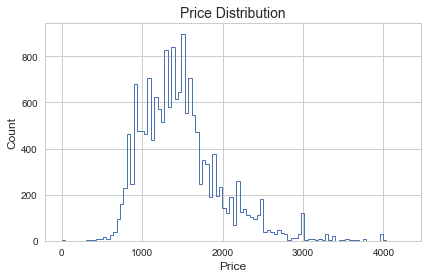

In [161]:
data = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Collection and Cleaning\Data Sources\cleaned_data_final.csv")
# plot prices to see what the distribution looks like
_ = plt.hist(data['price'], bins = 100, histtype = 'step', linewidth = 1)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Price Distribution', fontsize=14)
plt.show()

The price distribution for all listings is skewed right, and the center hovers around 1500-1700 dollars per month. This plot does not show the varying distributions of Studio, 1, 2, 3 or 4 bedroom groupings. The maxmimum price for a listing is slightly above 4000 per month. 

## Analyze The Price Distribution Across Listings With Unassigned Number of Beds

C:\Users\murra667\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


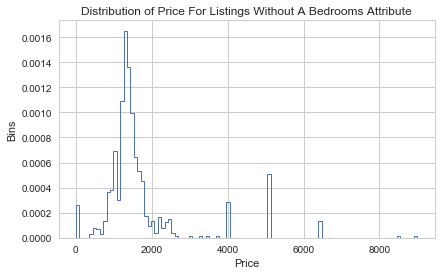

In [162]:
# import pickle file containing bed values that were unassigned
unassigned_beds = pd.read_pickle(r'C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Collection and Cleaning\craigslist_pickle_files\unassigned_beds.pickle', compression = "infer")
# limit to price column
unassigned_beds['price'] = unassigned_beds['price'].astype(float)
# drop clear outliers from unassigned beds
unassigned_beds = unassigned_beds.loc[unassigned_beds['price'] < 10000] 
unassigned_beds = unassigned_beds['price']
# visualize distribution of unassigned beds to look for patterns
_ = plt.hist(unassigned_beds, bins = 100, normed=True, histtype = 'step', linewidth = 1)
plt.xlabel("Price")
plt.ylabel("Bins")
plt.title("Distribution of Price For Listings Without A Bedrooms Attribute")
plt.show()

Rental data obtained through craigslist presented the challenge of discerning user inputs in the number of bedrooms variable, or the lack of thereof, and what bedroom classification was truly meant by the user for any given ad. 

Above is the distribution of prices for listings where no bedroom type was specified anywhere in the listing by the user. Potential reasons for not specifying a bedrooms attribute could have been 1) the listing was for a physical bedroom space available in a multi-bedroom unit, or a studio apartment, both conditions that the user is not able to specify with the values allowed by craigslist 2) the user simply did not specify bedrooms unrelated to the formerly stated possibilities. 

The distribution appears normal, suggesting that there was no one bed grouping that is overrepresented in not containing a bed attribute specified by the user.

C:\Users\murra667\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


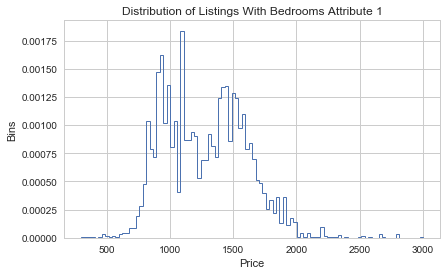

In [163]:
# import dataframe containing column on properties over fair market rent
over_fmr = pd.read_csv("over_fmr_dataframe.csv")
# subset beds that were assigned one to take a closer look
one_bed = over_fmr.loc[over_fmr['beds_baths'] == "1"]
#plot_df = updated_df_clean.loc[updated_df_clean['no match'] == True]
#print (len(plot_df))
_ = plt.hist(one_bed['price'], bins = 100, normed=True, histtype = 'step', linewidth = 1)
plt.xlabel("Price")
plt.ylabel("Bins")
plt.title("Distribution of Listings With Bedrooms Attribute 1")
plt.show()

The distribution for listings with a bedroom attribute of "1" was plotted to examine if there is more than one cluster of price values among this category of listings. In listings where the user specified "1" as the bedroom attribute, the listing may have been for an actual 1 bedroom apartment, one single bedroom in a multi-bedroom living situation, or a studio apartment - since there is no option for users to classify the latter two on craigslist. The distribution does have some characteristics of a bi-modal distribution. Assuming that 1 bedroom rentals are more expensive than studio bedrooms, it is possible that the lower values represent listings of studio apartements, and the higher values, 1 bedroom apartments. A test of normality is performed on this distribution below.

## Test of Normality of Distribution of Listings With Bedroom Attribute of 1

Null Hypothesis: The sample of listings labeled as one bedroom comes from a normal distribution

Alternative Hypothesis: The sample of listings labeled as one bedroom does not come from a normal distribution

Alpha = .05

In [164]:
# import dataframe containing column on properties over fair market rent
over_fmr = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Data_Collection\Craigslist Data\geocode_2\Data Storytelling\over_fmr_dataframe.csv")
# subset beds that were assigned one to take a closer look
one_bed = over_fmr.loc[over_fmr['beds_baths'] == "1"]
x = (one_bed[['price']])
# run test of normality 
k2, p = stats.normaltest(x)
print("P-value {}".format(p))

P-value [1.19958732e-47]


A test of normality for the sample of craigslist listings advertised as 1 bedroom at the .05 level of significance suggests to accept the alternative hypothesis, that the distribution is not normal.

Statistical significance pointing at the non-normality of the distribution of one-bedroom listings could mean that the distribution is bi-modal, in which case one of the groupings may be listings for studio apartments or single bedrooms in multi-bedroom units, and the other, listings for true 1 bedroom apartments. In order to better estimate affordability - using the fair market rent and price distributions of bedroom groupings as an estimate as an estimate -, there may be a need to reclassify some of the listings listed as one bedroom as studio apartments or listings for an actual bedroom in a multi-bedroom unit. If listings that are truly Studio apartments are being listed as 1-bedroom apartments, this would overestimate affordability of zip codes. While there is no fair market rate for a single bedroom in a multi-bedroom unit, perhaps this could be estimated by taking the average of the 2 bedroom rate divided by two, the 3 bedroom rate divided by three and the 4 bedroom rate divided by 4. This value would be equal to a rate of $504 dollars for the price of renting the average bedroom in a mult-bedroom unit in the Twin Cities. This assumes that there is a significant amount of people who are using the 1 bedroom attribute allowed by craigslist to advertise a physical bedroom space in a mult-bedroom unit. Future iterations of this project should consider this nuance in the data and attempt to reclassify listings with the one bedroom attribute appropriately.


## Analyze The Relationship Between Square Feet and Price Attributes

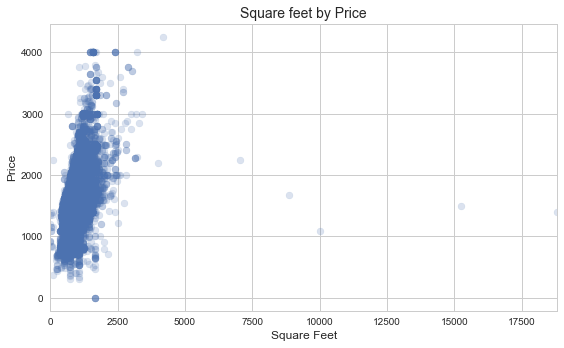

In [165]:
# generate a scatterplot for price vs square feet 
# and create lists as inputs
x = [a for a in data['square feet']]
y = list(data['price'])
# generate plot object
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
# set plot configurations
ax.set_xlim([0, max(x)])
ax.set_xlabel('Square Feet', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Square feet by Price', fontsize=14)
# set plot layout
ax.grid(True)
fig.tight_layout()
plt.show()

The scatterplot below suggests a strong relationship between Square Feet and Price, with almost all rentals, regardless of price, under 2500 square feet. 

## Pearson Correlation Coefficient Between Price and Square Feet

Alpha Level = .05

Null Hypothesis: There is no significant relationship between the square feet and price variables

Alternative Hypothesis: There is a statistically significant relationship between the square feet and price variables

In [171]:
# run pearson r to obtain correlation coefficient between square ft and price
coef, p = stats.pearsonr(over_fmr['price'], over_fmr['square feet'])
print ("Correlation Coefficient: {}\nP-value: {}".format(coef, p))

Correlation Coefficient: 0.47122639914774045
P-value: 0.0


As is indicated by the results Pearson Correlation Coefficient between Price and Square feet, at the .05 level of significance we can accept the alternative hypothesis that there is a relationship between the Price and Square Feet variables. The correlation coefficient suggests that 47% of the variance of the Price residuals can be explained by the variance of the residuals of the Square Feet residuals. This correlation suggests that Square Feet may be an important variable to include in a linear regression model that attempts to predict the price of a listing. 

## Autocorrelation and Partial Autocorrelation to Investigate Relationship Between Price And Time

In [167]:
# subset price and datetime
time_df = over_fmr[['datetime', 'price']]
# set datetime as index
time_df = time_df.set_index(['datetime'])
# create datetime object
time_df.index = pd.to_datetime(time_df.index)

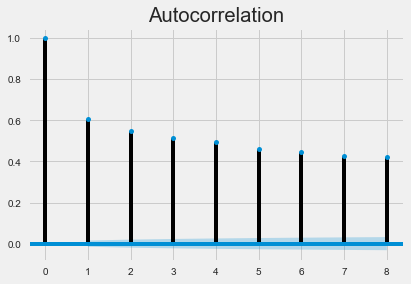

In [168]:
# use fivethirtyeight plot style
plt.style.use('fivethirtyeight')
# Display the autocorrelation of price over time
fig = tsaplots.plot_acf(time_df, lags=8)
# Show plot
plt.show()

The autocorrelation plot with 8 lag windows to represent approximately 2-week periods in the dataset shows a statistically significant correlation between time and price variables for all 8 lags. The highest correlation coefficient around 60%, and the lowest slightly above 40%. 

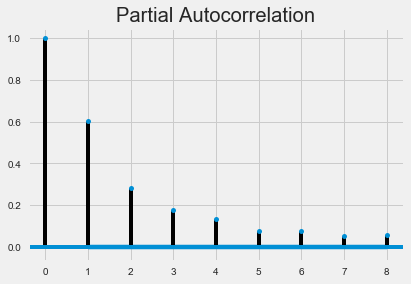

In [169]:
# Display partial autocorrelation of price over time
fig = tsaplots.plot_pacf(time_df, lags=8)
# Show plot
plt.show()

Performing autocorrelation and partial autocorrelation tests on the Price and Time variables of the dataset produced some statistically significant results. An autocorrelation plot with 8 lag windows to represent approximately 2-week periods in the dataset shows a statistically significant correlation between time and price variables for all 8 lags. The highest correlation coefficient around 60%, and the lowest slightly above 40%. A partial autocorrelation plot with the same number of lag windows also shows a statistically significant correlation between time and price variables albeit, smaller and decreasing over time. A partial autocorrelation may be better representative of the true correlation between price and time variables, as it removes the effects of variables besides price and time. As the time variable increases, the measure of statistical significance of correlation between time and price (0-1) nears closer to 0, indicating that there may not be a statistically significant correlation between the two variables. 

## Conclusions For Machine Learning

### From the inferential statistics performed above, it can be assumed when building machine learning models that:

### 1. A listing in Minneapolis, St. Paul or neither may be an important feature in training a model related to predicting price 

### 2. Determining the accuracy and integrity of listing labels for bedroom attributes is may be an important part of future iterations of this project

### 3. Square feet will be an important feature in training a model related to predicting price

### 4. Time may not be an important feature in training a model related to predicting price

# Machine Learning

In [190]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.model_selection import GridSearchCV
from time import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

## Classify Listings With Prices One Standard Deviation Above or Below The Fair Market Rent 

In [173]:
# read in dataset with craigslist listing attributes, census data
# and over fair market rent labels
df = pd.read_csv(r"C:\Users\murra667\Documents\Springboard\Capstone _1\Machine Learning\machine_learning_df_merged.csv")

In [203]:
# create st. paul, minneapolis or neither attribute
df['MINNEAPOLIS'] = 0
df['SAINT PAUL'] = 0
df.loc[df['City'] == "MINNEAPOLIS", "MINNEAPOLIS"] = 1
df.loc[df['City'] == "SAINT PAUL", "SAINT PAUL"] = 1

In [199]:
# determine whetheer listing is in the subrubs or in minneapolis/st paul
df['main_city'] = 0
df.loc[(df['City'] == "MINNEAPOLIS") | (df['City'] == "SAINT PAUL"), "main_city"] = 1

Listings with prices at least one standard deviation of the prices distribution above the Fair Market Rent for the region are labeled as 1 and those with prices less than one standard deviation above the Fair Market Rent are labeled as 0. Standard deviation in this case is segmented by the price distribution of each value grouping along the beds attribute (Studio, 1, 2, 3, 4). For example a listing with a "studio" value for bedroom attribute is assigned a label of 1 if its price is greater than the sum of the Twin Cities Fair Market Rent value for a studio apartment - $711/mo - and one standard deviation of the price distribution for all listings with "studio" as the bedroom attribute. For this analysis, listings classified as 1 will be considered unaffordable, and those classifed as 0 will be considered affordable. The Fair Market Rent was determined to be an appropriate threshold since it is used as a standard by the U.S. Department of Housing and Urban Planning in setting the agenda for affordable housing policies and programs such as Housing Choice Vouchers. 

This classifier aims to serve policy-makers by shaping their understanding of where affordable housing is most needed in the Twin Cities real-time, and what the most important predictor variables of housing affordability are. Rental data from Craigslist may in some ways reflect the real-time rental market of the Twin Cities and the availability of affordable housing given certain searching criteria. Local planning bodies can leverage knowledge of key features that determine affordablility for renters to shape local policy that benefits renters.

In [174]:
zeros = len(df.loc[df['over fmr1'] == 0])
ones = len(df.loc[df['over fmr1'] == 1])
print ("The original dataset contains {} listings labeled as 0 and {} listings labeled as one".format(zeros, ones))

The original dataset contains 8845 listings labeled as 0 and 8417 listings labeled as one


# All Features Model

## To start, train a model that includes most quantifiable attributes obtained through Craigslist and the US Census

baths: contained in at least one of the tags pulled during web scraping

total: Total number of units in zipcode

density:  Population per square miles in zipcode

water area:  Aggregate amount of water area in square meters per zipcode

population: Total population in zipcode

land area: aggregate amount of land area in square meters per zipcode

square feet: the square feet of the listing pulled during web scraping

beds: The beds value contained in at least one of the tags pulled during web scraping

MINNEAPOLIS: A number denoting whether a listing is in Minneapolis as per conclusions made during inferential statistics of a statistically significancant difference in affordability between Minneapolis and St. Paul

    Minneapolis = 1
    
    non-minneapolis = 0

SAINT PAUL: A number denoting whether a listing is in Saint Paul as per conclusions made during inferential statistics of a statistically significancant difference in affordability between Minneapolis and St. Paul
        
    Saint Paul = 1
    
    non- st. paul = 0

main_city: A number denoting whether a listing is in St. Paul or Minneapolis, or a suburban city as per conclusions made during inferential statistics about statistical significant difference of proportion of affordable listings between the suburbs and the two main cities. 

    listing is in Minneapolis or Saint Paul = 1
    
    listing is in a suburb = 0
    

#### These attributes were chosen using basic knowledge of what tends to impact housing cost and housing affordability in major metropolitan areas. 

In [208]:
# take the features that we want to use to train the forest
X = df[["MINNEAPOLIS", "SAINT PAUL", "main_city", "baths", "total", "density", "water area", "population", "land area", "square feet", "beds"]]
# set the target dataset to train and convert column to array
y = df[['over fmr1']]

In [210]:
X.head(5)

,aggregate wages,MINNEAPOLIS,SAINT PAUL,main_city,baths,total,density,water area,population,land area,square feet,beds
0,305584146.0,0,1,1,1.0,6545.0,3737.40458,0.02,14688.0,3.93,900.0,2
1,305584146.0,0,1,1,1.0,6545.0,3737.40458,0.02,14688.0,3.93,764.0,1
2,305584146.0,0,1,1,1.0,6545.0,3737.40458,0.02,14688.0,3.93,925.0,2
3,305584146.0,0,1,1,1.0,6545.0,3737.40458,0.02,14688.0,3.93,750.0,1
4,305584146.0,0,1,1,1.0,6545.0,3737.40458,0.02,14688.0,3.93,729.0,2


In [209]:
# split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# creat a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)
# train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
# predict the y values
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
matrix

Accuracy: 0.9241166248310485
Recall: 0.9113573407202216


array([[2483,  169],
       [ 224, 2303]], dtype=int64)

## Evaluate Feature Importances of Model

In [206]:
# print the feature importances 
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

square feet    0.416871
population     0.109021
land area      0.097694
total          0.092541
beds           0.089767
baths          0.073690
density        0.054827
water area     0.046620
main_city      0.007918
MINNEAPOLIS    0.007917
SAINT PAUL     0.003134
dtype: float64

The ten input features seem to train a strong model, with a 92% accuracy. In addition, the recall score for the model is high and an error matrix shows a low number of Type I and Type II errors. Contrary to what was assumed would be a high feature importance from the SAINT PAUL, MINNEAPOLIS or main_city features, these three features have little importance in the model.

# Census Data & Square Feet Model

### The Square Feet  attribute seems to be the key feature in enhancing predictive power of the model. To see how accurate the model can be trained with only this craigslist listing attribute combined with census data, we train the following model


In [211]:
X = df[["square feet", "population", "water area", "density", "land area"]]
# set the target dataset to train and convert column to array
y = df[['over fmr1']]

In [212]:
# split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# creat a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)
# train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
# predict the y values
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
matrix

Accuracy: 0.909635064684302
Recall: 0.9039968652037618


array([[2404,  223],
       [ 245, 2307]], dtype=int64)

In [213]:
# print the feature importances 
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

square feet    0.580487
population     0.158506
land area      0.120964
density        0.077669
water area     0.062374
dtype: float64

The performance of this model is slightly lower than that of the original model. As can be seen, some of the census features take on higher feature importances in the absence of features from the craigslist listings

# Craigslist Only Model

### To see how accurate the model can predict with only craigslist listing attributes, we train the following model

In [214]:
X = df[["square feet", "baths", "beds", "MINNEAPOLIS", "SAINT PAUL", "main_city"]]
# set the target dataset to train and convert column to array
y = df[['over fmr1']]

In [215]:
# split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# creat a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)
# train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
# predict the y values
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8845336937632747
Recall: 0.8705975464978235


In [216]:
# print the feature importances 
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

square feet    0.721468
beds           0.136765
baths          0.082992
main_city      0.027033
MINNEAPOLIS    0.025168
SAINT PAUL     0.006575
dtype: float64

Alone, attributes from the Craigslist listing combined with the square feet attribute perform worse than both models. This shows that variables from the US Census Data do have some influence over the prediction outcome. Understandably, the "square feet" attribute accounts for even more of the feature importance. Additionally, the main_city and MINNEAPOLIS attributes, which did not have much significance in the All Features Model, absorb slightly more feature importance. The beds attribute also inreases in feature importance. It may be useful to determine the importance of different values in the "beds" attribute in predicting affordability using a chi-squared test of difference. 

 # Testing For Difference in Affordability Across Bedroom Values Using Chi-Squared

In [229]:
# get the count of unaffordable listings for each bedroom type 
observations = []
# get the count of listings for each bedroom type
total_bedroom_types = []
# map bedroom groupings into subset 
bedroom_types = [0, 1, 2, 3, 4]
# iterate through bedroom types
for bedroom in bedroom_types:
    # subset by bedroom types
    subset = df.loc[df['beds'] == bedroom]
    # store count of listings for each bedroom type in list
    total_bedroom_types.append(len(subset))
    # count the observations of unaffordable units
    count = subset['over fmr1'].sum()
    # store count in list
    observations.append(count)

In [232]:
# get the pct each bed grouping accounts for in the total listing population
pct_of_population = []
# get pct of observations of unaffordability for each bed grouping
pct_of_observations = []
# get the proportional expected observations of unaffordability for each bed grouping
expected_cnt = []
# get total of number of listings 
total = sum(total_bedroom_types) 
# get total number of over fmr observations
over_fmr_obs = sum(observations)
# iterate through the totals of bedroom types
for group_total, obs_total in zip(total_bedroom_types, observations):
    # get the proportion each group makes up of all bedroom types
    # and store in pct_of_population
    pct = group_total / total
    pct_of_population.append(pct)
    # multiply pct of each bedroom type per total listings
    # by total observed unaffordability to get expected cnts
    # (assuming equal distribution in each grouping) of 
    # unaffordability across bed types
    expected_cnt.append(pct * over_fmr_obs)
    # store the pct of observations of affordability for each bed group
    pct_of_observations.append(obs_total / over_fmr_obs)

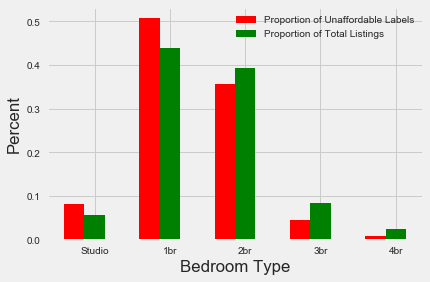

In [233]:
# plot 5 bars
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
# instantiate plot object
fig = plt.figure()
# add subfigures
ax = fig.add_subplot(111)
# set parameters of unaffordable bar
pct_unaffordable = ax.bar(ind, pct_of_observations, width, color='r')
# set parameters of entire population bar
pct_population = ax.bar(ind+width, pct_of_population, width, color='g')
# set y label
ax.set_ylabel('Percent')
# set x label
ax.set_xlabel('Bedroom Type')
# indicate width between ticks
ax.set_xticks(ind+width)
# set tick lables
ax.set_xticklabels( ('Studio', '1br', '2br', '3br', '4br', '5br') )
# set legend 
ax.legend( (pct_unaffordable[0], pct_population[0]), ('Proportion of Unaffordable Labels', 'Proportion of Total Listings') )

When feature in the model include only feature from the Craigslist listing, - "beds", "baths" and "square feet" - the "beds" feature shows an increase in feature importance. This observation, combined with general knowledge of market values suggests that the number of bedrooms for a listing is important in deciding its affordability. 

As is seen in the figure above, assuming that there is an equal likelihood that any given bedroom type is unaffordable, Studio and 1 bedroom types have a higher percentage of unaffordable listings than would be expected for the number of listings that they represent for the entire population

# Chi-squared Test 

### alpha = .05
### Ho: Each bedroom type has an equal likelihood of being unaffordable
### Ha: Each bedroom type does not have an equal likelihood of being unaffordable

In [234]:
statistic, p = stats.chisquare(observations, f_exp = expected_cnt)
print ("Chi-squared statistic: {}\nP-value: {}".format(round(statistic, 2), round(p, 10)))

Chi-squared statistic: 486.39
P-value: 0.0


The p-value is less than the alpha value, so we reject the null hypoethesis that a discrepancy between the observed and expected distributions of bedroom type and affordability at least this extreme is due to chance. 

# Final Model

### The three models so far show that best performance is achieved when both data from the US Census and Craigslist listings are combined together. The last model incorporates a combination of some craigslist attributes and some some US Census attributes. 

In [220]:
X = df[["square feet", "land area", "baths", "beds"]]
# set the target dataset to train and convert column to array
y = df[['over fmr1']]

In [221]:
# split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# creat a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)
# train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
# predict the y values
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9281714616721375
Recall: 0.9218436873747495


In [222]:
# print the feature importances 
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

square feet    0.441406
land area      0.396804
beds           0.095062
baths          0.066727
dtype: float64

A model incorporating square feet and both attributes from the Craigslist listing and US Census Data, albeit fewer than the original model produces a slightly lower accuracy than the model incorporating the largest number of attributes. Absent other attributes from US Census Data at the zipcode level, it appears that the "land area" attribute absorbs the feature importances that the other Census attributes contributed when they were part of the model. The statistical significance of relationships between attributes and the effects of certain attributes on the model is further analyzed below. 

# Comparing Zip Code Land Area of Listings with 0 and 1 Labels 

As indicated by the feature importances of the Final Model, which incorporated the "square feet", "beds", "baths" and "land area" features, the "land area" variable is the second most important feature in the model for deciding between an affordable listing and an unaffordable listing. It is therefore of interest to determine to what level of statistical significance the land areas of the zipcodes in which unaffordable and affordable listings are located differ. 

### Ho: There is not a significant difference between the mean aggregate amount of land area in square meters for unaffordable listings and unaffordable listings 

### Ha: There is a significant difference between the mean aggregate amount of land area in square meters for unaffordable listings and unaffordable listings 

In [ ]:
# separate zip codes by their affordability label 
affordable = df.loc[df['over fmr1'] == 0]
unaffordable = df.loc[df['over fmr1'] == 1]

In [ ]:
# run two sample means t-test 
t, p = stats.ttest_ind(affordable['land area'], unaffordable['land area'])
("P- value: {}".format(p))

As was demonstrated by the model incorporating only features from zipcode census data alongside the "square feet" feature, features such as "population", "density" and "land area" all seemed to contribute equally in their feature importances. When "land area" was included as the only feature in the model from the zipclde census data, it seemed to absorb the feature importances that the other zipcode census data accounted for. Therefore it was of interest to examine the relationship between "land area" and other zipcode census features such as "population" and "density" to see if these features are interdependent. 

## Plot Relationship Between Zipcode Population and Land Area

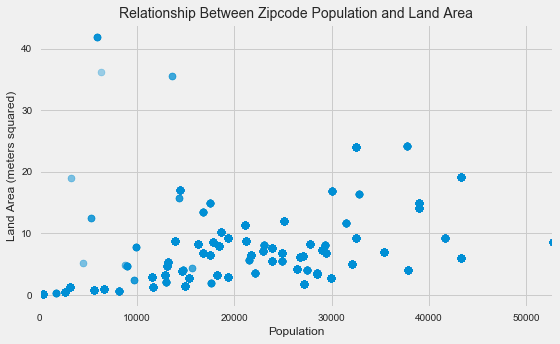

Correlation Coefficient: 0.44
P-value: 0.0


In [223]:
# generate a scatterplot for price vs square feet 
# and create lists as inputs
x = [a for a in df['population']]
y = list(df['land area'])
# generate plot object
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
# set plot configurations
ax.set_xlim([0, max(x)])
ax.set_xlabel('Population', fontsize=12)
ax.set_ylabel('Land Area (meters squared)', fontsize=12)
ax.set_title('Relationship Between Zipcode Population and Land Area', fontsize=14)
# set plot layout
ax.grid(True)
fig.tight_layout()
plt.show()
coef, p = stats.pearsonr(df['population'], df['land area'])
print ("Correlation Coefficient: {}\nP-value: {}".format(round(coef, 2), p))

## Plot Relationship Between Zipcode Density & Land Area

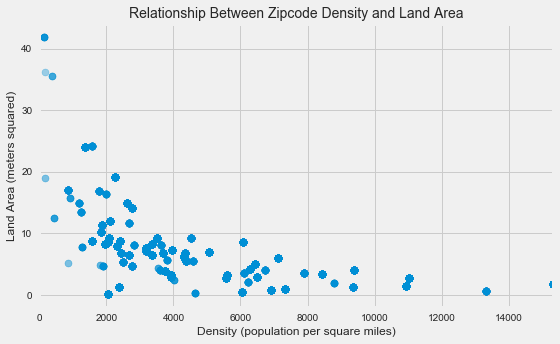

Correlation Coefficient: -0.6
P-value: 0.0


In [224]:
# generate a scatterplot for price vs square feet 
# and create lists as inputs
x = [a for a in df['density']]
y = list(df['land area'])
# generate plot object
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
# set plot configurations
ax.set_xlim([0, max(x)])
ax.set_xlabel('Density (population per square miles)', fontsize=12)
ax.set_ylabel('Land Area (meters squared)', fontsize=12)
ax.set_title('Relationship Between Zipcode Density and Land Area', fontsize=14)
# set plot layout
ax.grid(True)
fig.tight_layout()
plt.show()
coef, p = stats.pearsonr(df['density'], df['land area'])
print ("Correlation Coefficient: {}\nP-value: {}".format(round(coef, 2), p))

As is evidenced by the Density and Land Area plot and the Population and Land Area plot, as well as the p-values of the pearson r correlation tests, there is a statistically significant relationship between "land area" and these other two variables. 44% of the variance of the residuals in Land Area can be explained by variance in the Density residuals and 60% can be explained by the variance of the Population residuals. 

The Density and Land Area plot hints that the relationship between Land Area and Density may not be linear. Nontheless, the interdependency of these variables suggests a need for further analysis of the effect that they have on predicting affordability. 